# Image Segmentation

Qu'est-ce que la segmentation d'images ?

Partitionner une image en régions d'intérêt (exemple : dans une image d'un visage humain, trouver quels pixels sont l'humain et lesquels sont l'arrière-plan)

Objectif : essayez de trouver des limites autour des pixels liés/similaires (en couleur, texture, etc.)

Output : une image avec des étiquettes et qui a la même dimension que l'image d'entrée ou chaque region aura une couleur qui la distingue des autres régions.

par exemple poursegmenter un visage on aura deux régions d'interet (région_1 pour le visage et région_2 pour l'arrière-plan)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Opencv_master

/content/drive/MyDrive/Opencv_master


[The Watershed Algorithm](https://people.cmm.minesparis.psl.eu/users/beucher/wtshed.html)

<img src="https://people.cmm.minesparis.psl.eu/users/beucher/ima3.gif">

In [ ]:
img = cv2.imread('coinsb.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# sepparer les objets
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# région sûre de l'arrière plan
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Trouver une zone sûre du premier plan
# calculer la distance où vous avez des zéros d'où vous avez des uns
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,5)

ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Trouver les régions inconnues
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# tous pixels connectés auront une même valeur
ret, markers = cv2.connectedComponents(sure_fg)

# Ajoutez 1 à toutes les étiquettes afin que l'arrière-plan ne soit pas 0, mais 1
markers = markers+1

# Maintenant, marquez la région de l'inconnu avec 0
markers[unknown==255] = 0

img_seg = cv2.watershed(img, markers.copy())
# img[markers == -1] = [255,0,0]

liste_images = [(img, "originale", 'gray'), (thresh, "thresh", 'gray'), (opening, "opening", 'gray'),
                (sure_bg, "sure_bg", 'gray'), (dist_transform, "dist_transform", 'gray'), (sure_fg, "sure_fg", 'gray'),
                (unknown, "unknown", 'gray'), (markers, "markers", None), (img_seg, "img_seg", None)]

i=0
plt.figure(figsize=(20,10))
for im,t,c in liste_images:
    plt.subplot(3,3,i+1), plt.imshow(im, cmap=c)
    plt.title(t)
    plt.xticks([]),plt.yticks([])
    i+=1
plt.show()

# Image Transformations

## Resizing

In [ ]:
facteur=2.
img = cv2.imread('messi5.jpg')

# juste cette ligne fera l'affaire
res = cv2.resize(img,None,fx=facteur, fy=facteur, interpolation = cv2.INTER_CUBIC)


# Le reste du code juste pour l'affichage
height, width = img.shape[:2]

bigheight = int(np.amax([facteur*height , height]) )
bigwidth = int(width*(1+facteur))

bigim = np.zeros((bigheight, bigwidth ,3),np.uint8)
bigim[:height,:width] = img

if facteur > 1:
    bigim[:,width:] = res
else:
    bigim[: int(facteur*height),width:] = res

plt.figure(figsize=(15,10))
plt.imshow(bigim)
plt.title('original                                                   \
                                                                    resized');


## Translation

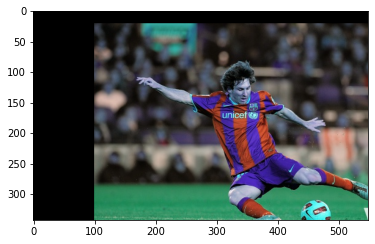

In [26]:

img = cv2.imread('messi5.jpg')
rows,cols,chans = img.shape

xt=100
yt=20

M = np.float32([[1,0,xt],[0,1,yt]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure()
plt.imshow(dst)


[Plus sur La transformation affine](https://theailearner.com/tag/cv2-warpaffine/)

## Rotation

In [ ]:
img = cv2.imread('messi5.jpg')
rows,cols, chans = img.shape

#spécifier le degré de rotation
theta = 45.0 #contre montre sens

M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,1) 
dst = cv2.warpAffine(img,M,(cols,rows))
                 
plt.figure(figsize=(15,10))
plt.imshow(dst)            


## General affine transform

Mapper 3 points d'entrée (x,y) à 3 points de sortie
c'est-à-dire parallélogramme à parallélogramme
Effectuera la translation, le resizing et la rotation.

In [ ]:
img = cv2.imread('messi5.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')



## Perspective transform
transformation en 4 points
* Non linéaire mais plus général que l'affine
* Perspective : les objets plus éloignés paraissent plus petits

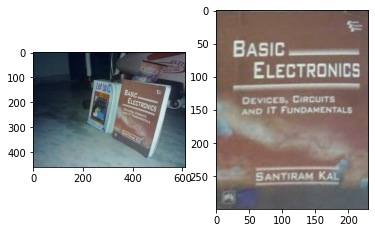

In [34]:
img = cv2.imread('right.jpg')
rows,cols,chans = img.shape

startpts =  np.float32([[362, 107], [530,139] , [453,416], [319,337]])
endpts   =  np.float32([[100, 100], [330,100],  [330,400], [100,400]])

M = cv2.getPerspectiveTransform(startpts,endpts)

dst = cv2.warpPerspective(img,M,(rows,cols))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(dst[100:400,100:330])
